In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Purpose
The purpose of this notebook is to look at the relationship between boolean minimization terms and a few different partial information decompositions

In [9]:
pid_df = pd.read_csv('../data/eca_decompositions/imin_df.csv', index_col=0)
bool_df = pd.read_csv('../data/eca_decompositions/bool_min.csv', index_col=0)

df = pd.merge(pid_df, bool_df, on='rule')
print(df.head())

rule  ((0,), (1,), (2,))  ((0,), (1,))  ((0,), (2,))  ((0,), (1, 2))  \
0     0            0.000000      0.000000           0.0             0.0   
1     1            0.137925      0.000000           0.0             0.0   
2     2            0.137925      0.000000           0.0             0.0   
3     3            0.000000      0.311278           0.0             0.0   
4     4            0.137925      0.000000           0.0             0.0   

   ((0,),)  ((1,), (2,))  ((1,), (0, 2))  ((2,), (0, 1))  \
0      0.0           0.0             0.0             0.0   
1      0.0           0.0             0.0             0.0   
2      0.0           0.0             0.0             0.0   
3      0.0           0.0             0.0             0.0   
4      0.0           0.0             0.0             0.0   

   ((0, 1), (0, 2), (1, 2))  ...  ((0, 2),)  ((1, 2),)  ((0, 1, 2),)  r*(0)  \
0                  0.000000  ...        0.0        0.0          0.00    1.0   
1                  0.155639  ... 

## Correlations between $I_{min}$ terms and boolean minimization stats

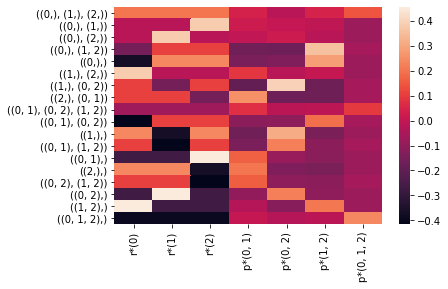

In [10]:
df_dropped = df.drop('rule', axis=1)
y_list = pid_df.drop('rule', axis=1).columns
x_list = bool_df.drop('rule', axis=1).columns

# we dont care about correlations of PI terms with each other
corr = df_dropped.corr()
small_corr = corr.loc[y_list, x_list]

sns.heatmap(small_corr)
plt.show()

Nothing correlates particularly well. We can try looking at the specific relationships between the actual measurements directly.

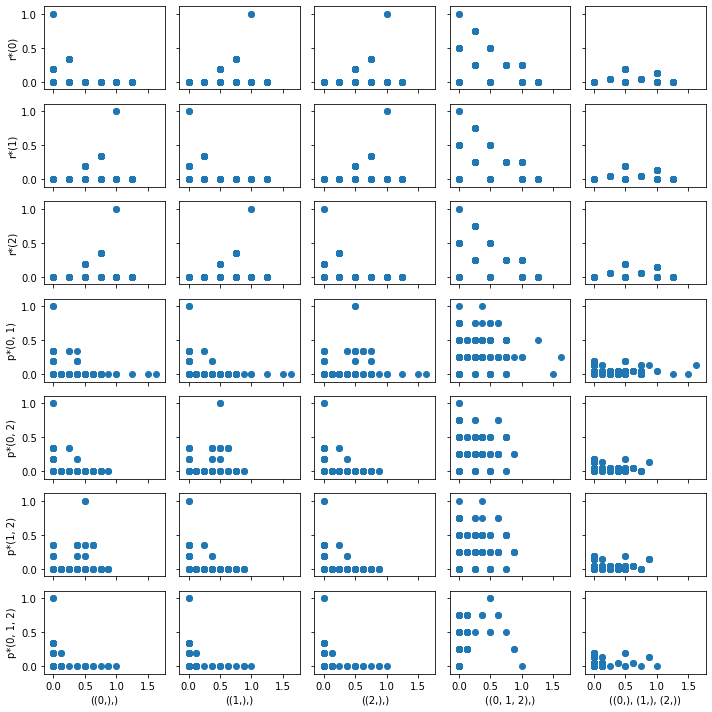

In [20]:
# get iterables of our column names
interpretable_pi = ['((0,),)', '((1,),)', '((2,),)', '((0, 1, 2),)', '((0,), (1,), (2,))']
bool_min = bool_df.drop('rule', axis=1).columns

# make a bunch of plots in one big plot!
fig, ax = plt.subplots(figsize=(10, 10), nrows=len(bool_min), ncols=len(interpretable_pi), sharex=True, sharey=True)
for pi, pi_term in enumerate(interpretable_pi):
    for bi, bm_term in enumerate(bool_min):
        ax[bi, pi].scatter(df[bm_term], df[pi_term])
        if bi == len(bool_min) - 1:
            ax[bi, pi].set_xlabel(pi_term)
        if pi == 0:
            ax[bi, pi].set_ylabel(bm_term)
plt.tight_layout()
plt.show()

$I_{min}$ and boolean minimization dont seem to correlate well, at least not well enough to make inferences on boolean functions using the information theoretic values

## Correlations between $I_{ccs}$ and boolean minimization terms

In [7]:
pid_df = pd.read_csv('../data/eca_decompositions/ccs_df.csv', index_col=0)
bool_df = pd.read_csv('../data/eca_decompositions/bool_min.csv', index_col=0)

df = pd.merge(pid_df, bool_df, on='rule')
print(df.head())

rule  ((0,), (1,), (2,))  ((0,), (1,))  ((0,), (2,))  ((0,), (1, 2))  \
0     0            0.000000      0.000000      0.000000             0.0   
1     1            0.024081      0.024081      0.024081             0.0   
2     2            0.024081      0.024081      0.024081             0.0   
3     3            0.000000      0.103759      0.000000             0.0   
4     4            0.024081      0.024081      0.024081             0.0   

    ((0,),)  ((1,), (2,))  ((1,), (0, 2))  ((2,), (0, 1))  \
0  0.000000      0.000000             0.0             0.0   
1  0.065683      0.024081             0.0             0.0   
2  0.065683      0.024081             0.0             0.0   
3  0.207519      0.000000             0.0             0.0   
4  0.065683      0.024081             0.0             0.0   

   ((0, 1), (0, 2), (1, 2))  ...  ((0, 2),)  ((1, 2),)  ((0, 1, 2),)  r*(0)  \
0                       0.0  ...   0.000000   0.000000      0.000000    1.0   
1                       0.0

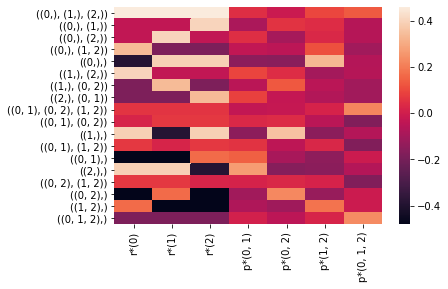

In [8]:
df_dropped = df.drop('rule', axis=1)
y_list = pid_df.drop('rule', axis=1).columns
x_list = bool_df.drop('rule', axis=1).columns

# we dont care about correlations of PI terms with each other
corr = df_dropped.corr()
small_corr = corr.loc[y_list, x_list]

sns.heatmap(small_corr)
plt.show()

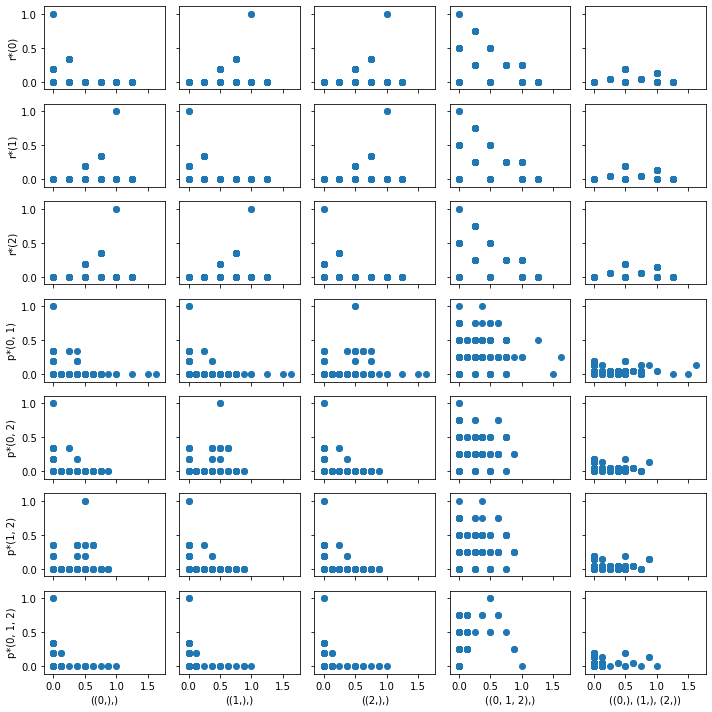

In [21]:
# get iterables of our column names
interpretable_pi = ['((0,),)', '((1,),)', '((2,),)', '((0, 1, 2),)', '((0,), (1,), (2,))']
bool_min = bool_df.drop('rule', axis=1).columns

# make a bunch of plots in one big plot!
fig, ax = plt.subplots(figsize=(10, 10), nrows=len(bool_min), ncols=len(interpretable_pi), sharex=True, sharey=True)
for pi, pi_term in enumerate(interpretable_pi):
    for bi, bm_term in enumerate(bool_min):
        ax[bi, pi].scatter(df[bm_term], df[pi_term])
        if bi == len(bool_min) - 1:
            ax[bi, pi].set_xlabel(pi_term)
        if pi == 0:
            ax[bi, pi].set_ylabel(bm_term)
plt.tight_layout()
plt.show()

Patterns here actuallly seem a bit better but still not really good enough

## Correlations between $I_{dep}$ and boolean minimization terms

In [12]:
pid_df = pd.read_csv('../data/eca_decompositions/pm_df.csv', index_col=0)
bool_df = pd.read_csv('../data/eca_decompositions/bool_min.csv', index_col=0)

df = pd.merge(pid_df, bool_df, on='rule')
print(df.head())

rule  ((0,), (1,), (2,))  ((0,), (1,))  ((0,), (2,))  ((0,), (1, 2))  \
0     0            0.000000       0.00000      0.000000        0.000000   
1     1            0.293564      -0.05188     -0.051880       -0.051880   
2     2            0.293564      -0.05188     -0.051880       -0.051880   
3     3            0.561278       0.00000     -0.103759       -0.146241   
4     4            0.293564      -0.05188     -0.051880       -0.051880   

   ((0,),)  ((1,), (2,))  ((1,), (0, 2))  ((2,), (0, 1))  \
0      0.0      0.000000        0.000000        0.000000   
1      0.0     -0.051880       -0.051880       -0.051880   
2      0.0     -0.051880       -0.051880       -0.051880   
3      0.0     -0.103759       -0.146241       -0.103759   
4      0.0     -0.051880       -0.051880       -0.051880   

   ((0, 1), (0, 2), (1, 2))  ...  ((0, 2),)  ((1, 2),)  ((0, 1, 2),)  r*(0)  \
0                  0.000000  ...      0.000      0.000          0.00    1.0   
1                  0.436278  ... 

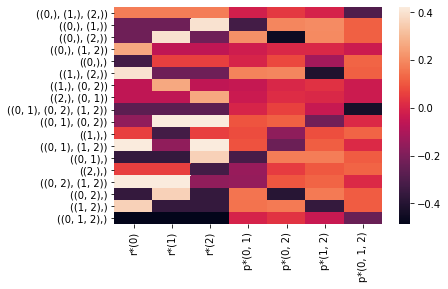

In [13]:
df_dropped = df.drop('rule', axis=1)
y_list = pid_df.drop('rule', axis=1).columns
x_list = bool_df.drop('rule', axis=1).columns

# we dont care about correlations of PI terms with each other
corr = df_dropped.corr()
small_corr = corr.loc[y_list, x_list]

sns.heatmap(small_corr)
plt.show()

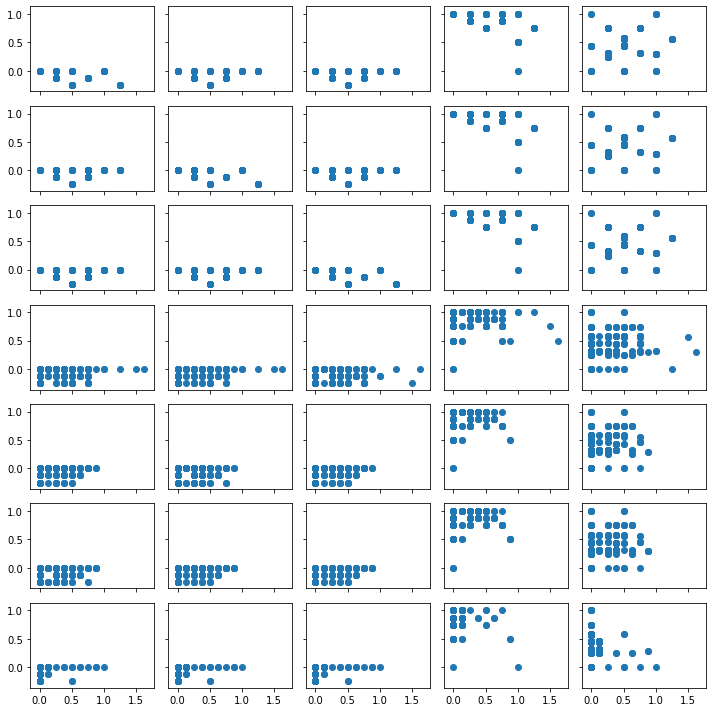

In [14]:
# get iterables of our column names
interpretable_pi = ['((0,),)', '((1,),)', '((2,),)', '((0, 1, 2),)', '((0,), (1,), (2,))']
bool_min = bool_df.drop('rule', axis=1).columns

# make a bunch of plots in one big plot!
fig, ax = plt.subplots(figsize=(10, 10), nrows=len(bool_min), ncols=len(interpretable_pi), sharex=True, sharey=True)
for pi, pi_term in enumerate(interpretable_pi):
    for bi, bm_term in enumerate(bool_min):
        ax[bi, pi].scatter(df[bm_term], df[pi_term])
plt.tight_layout()
plt.show()

This looks like nothing. So far the best bet is $I_{ccs}$ but its not great

In [3]:
pid_df = pd.read_csv('../data/eca_decompositions/disclosure_df.csv', index_col=0)
bool_df = pd.read_csv('../data/eca_decompositions/bool_min.csv', index_col=0)

df = pd.merge(pid_df, bool_df, on='rule')
print(df.head())

rule  ((0, 1, 2),)  ((0, 1), (0, 2), (1, 2))  ((0, 2), (1, 2))  \
0     0           0.0              0.000000e+00      0.000000e+00   
1     1           0.0              1.379254e-01     -8.881784e-16   
2     2           0.0              1.379254e-01     -1.110223e-15   
3     3           0.0              2.220446e-16      3.112781e-01   
4     4           0.0              1.379254e-01      0.000000e+00   

   ((0, 1), (1, 2))  ((0, 1), (0, 2))  ((0, 1), (2,))  ((1, 2), (0,))  \
0      0.000000e+00      0.000000e+00    0.000000e+00    0.000000e+00   
1     -3.108624e-15     -1.554312e-15    1.665335e-15    3.830269e-15   
2      0.000000e+00      1.110223e-15   -2.942091e-15    6.106227e-16   
3      1.110223e-16     -1.110223e-16   -1.110223e-16    3.053113e-15   
4      0.000000e+00      0.000000e+00   -1.110223e-16   -5.551115e-17   

   ((0, 2), (1,))  r*(0)  r*(1)  r*(2)  p*(0, 1)  p*(0, 2)  p*(1, 2)  \
0    0.000000e+00    1.0    1.0   1.00     0.000     0.000     0.000   
1    

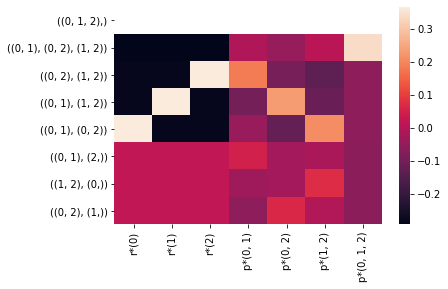

In [4]:
df_dropped = df.drop('rule', axis=1)
y_list = pid_df.drop('rule', axis=1).columns
x_list = bool_df.drop('rule', axis=1).columns

# we dont care about correlations of PI terms with each other
corr = df_dropped.corr()
small_corr = corr.loc[y_list, x_list]

sns.heatmap(small_corr)
plt.show()

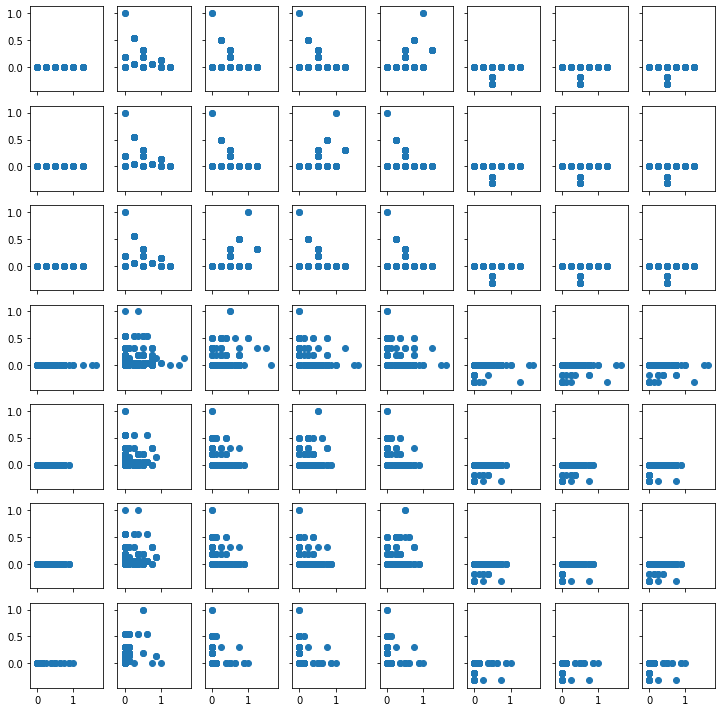

In [7]:
# get iterables of our column names
interpretable_pi = ['((0, 1, 2),)', '((0, 1), (0, 2), (1, 2))', '((0, 2), (1, 2))',
       '((0, 1), (1, 2))', '((0, 1), (0, 2))', '((0, 1), (2,))',
       '((1, 2), (0,))', '((0, 2), (1,))']
bool_min = bool_df.drop('rule', axis=1).columns

# make a bunch of plots in one big plot!
fig, ax = plt.subplots(figsize=(10, 10), nrows=len(bool_min), ncols=len(interpretable_pi), sharex=True, sharey=True)
for pi, pi_term in enumerate(interpretable_pi):
    for bi, bm_term in enumerate(bool_min):
        ax[bi, pi].scatter(df[bm_term], df[pi_term])
plt.tight_layout()
plt.show()

In [6]:
df.columns

Index(['rule', '((0, 1, 2),)', '((0, 1), (0, 2), (1, 2))', '((0, 2), (1, 2))',
       '((0, 1), (1, 2))', '((0, 1), (0, 2))', '((0, 1), (2,))',
       '((1, 2), (0,))', '((0, 2), (1,))', 'r*(0)', 'r*(1)', 'r*(2)',
       'p*(0, 1)', 'p*(0, 2)', 'p*(1, 2)', 'p*(0, 1, 2)'],
      dtype='object')